In [1]:
import ROOT
import os, sys
import argparse
# from ROOT import TCanvas,gStyle,TPad,TLegend,TPaveText
# from ROOT import kBlack,kTRUE
from ROOT import kBlack, kBlue, kRed, kViolet,kPink
from ROOT import *

Welcome to JupyROOT 6.22/06


In [3]:
#geom 17 from CMSSW_10
file1 = ROOT.TFile("/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_10_6_0/src/Validation/Geometry/test/matbdg_Pixel_Extended2017Plan1.root","READ") 
#geom 16 from CMSSW_10
file0 = ROOT.TFile("/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_10_6_0/src/Validation/Geometry/test/matbdg_Pixel_Extended2016.root", "READ")

In [4]:
file0.ls();

TFile**		/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_10_6_0/src/Validation/Geometry/test/matbdg_Pixel_Extended2016.root	
 TFile*		/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_10_6_0/src/Validation/Geometry/test/matbdg_Pixel_Extended2016.root	
  KEY: TH1F	11;1	Eta 
  KEY: TH1F	21;1	Phi 
  KEY: TH1F	41;1	R 
  KEY: TH1F	111;1	Eta [Support]
  KEY: TH1F	121;1	Phi [Support]
  KEY: TH1F	141;1	R [Support]
  KEY: TH1F	211;1	Eta [Sensitive]
  KEY: TH1F	221;1	Phi [Sensitive]
  KEY: TH1F	241;1	R [Sensitive]
  KEY: TH1F	311;1	Eta [Cables]
  KEY: TH1F	321;1	Phi [Cables]
  KEY: TH1F	341;1	R [Cables]
  KEY: TH1F	411;1	Eta [Cooling]
  KEY: TH1F	421;1	Phi [Cooling]
  KEY: TH1F	441;1	R [Cooling]
  KEY: TH1F	511;1	Eta [Electronics]
  KEY: TH1F	521;1	Phi [Electronics]
  KEY: TH1F	541;1	R [Electronics]
  KEY: TH1F	611;1	Eta [Other]
  KEY: TH1F	621;1	Phi [Other]
  KEY: TH1F	641;1	R [Other]
  KEY: TH1F	711;1	Eta [Air]
  KEY: TH1F	721;1	Phi [Air]
  KEY: TH1F	741;1	R [Air]
  KEY: TH1F	1011;1	Eta 
  KEY: TH1F	102

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


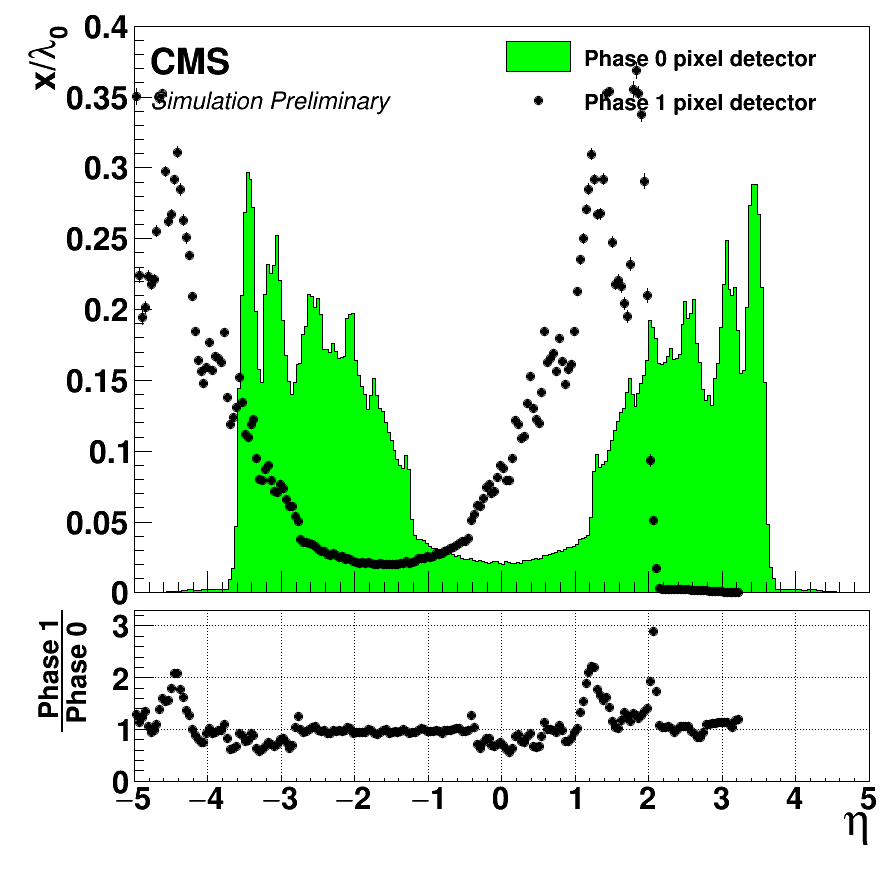

In [15]:
hist0 = file0.Get('1010')
hist1 = file1.Get('1010')

hist0.SetTitle("")
hist1.SetTitle("")

hist0.SetFillColor(ROOT.kGreen)
hist0.SetFillStyle(1) # After applyting this, we got the color.
hist0.SetLineColor(ROOT.kBlack)
hist0.SetLineWidth(1)

hist1.SetMarkerStyle(8)
hist1.SetMarkerColor(ROOT.kBlack)
# hist1.SetFillColor(ROOT.kGreen)


xmin = -5
xmax = +5

hist0.GetXaxis().SetRangeUser(xmin, xmax)
hist1.GetXaxis().SetRangeUser(xmin, xmax)



c1 = TCanvas('c1', 'MB Phase Comparison', 900, 900)
c1.SetTicks(0, 1)
gStyle.SetOptStat(0)

pad1 = TPad("pad1", "pad1",0,0.,1,1)
pad1.SetTopMargin(0.03)
pad1.SetLeftMargin(0.15)
pad1.SetRightMargin(0.03)
pad1.SetBottomMargin(0.32)
pad1.Draw()
pad1.cd()

hist0.SetTitle("")
hist0.GetYaxis().SetTitle("#bf{x/#lambda_{0}}")
hist0.GetXaxis().SetTitle("#bf{#eta}")
hist0.GetYaxis().SetTitleSize(0.045)
hist0.GetYaxis().SetTitleFont(42)
hist0.GetYaxis().SetTitleOffset(1.35)
hist1.GetYaxis().SetTitleOffset(1.35)
hist0.GetXaxis().SetLabelOffset(1000)
    #hist0.GetYaxis().SetNdivisions(515, kTRUE)
hist0.SetMinimum(0.0)
hist0.SetMaximum(0.4)
hist0.Draw("HIST")
hist1.Draw("EP SAME")

leg = TLegend(0.55,0.86,0.96,0.96)
leg.SetBorderSize(0)
leg.SetFillColor(0)
leg.SetFillStyle(0)
leg.SetTextFont(42)
leg.SetTextSize(0.028)
leg.AddEntry(hist0,"#bf{Phase 0 pixel detector}","f")
leg.AddEntry(hist1,"#bf{Phase 1 pixel detector}","p")
leg.Draw()

Pave1 = TPaveText(0.15,0.90,0.50,0.93,"NDC")
Pave1.SetFillColor(0)
Pave1.SetBorderSize(0)
Pave1.SetFillStyle(0)
Pave1.SetTextFont(42)
Pave1.SetTextSize(0.045)
Pave1.SetTextColor(kBlack)
Pave1.SetTextAlign(11)
Pave1.AddText("#bf{CMS}")
Pave1.Draw()

Pave2 = TPaveText(0.15,0.85,0.50,0.90,"NDC")
Pave2.SetFillColor(0)
Pave2.SetBorderSize(0)
Pave2.SetFillStyle(0)
Pave2.SetTextFont(42)
Pave2.SetTextSize(0.03)
Pave2.SetTextColor(kBlack)
Pave2.SetTextAlign(11)
Pave2.AddText("#it{Simulation Preliminary}")
Pave2.Draw()

ratio = hist1.Clone("ratio")
ratio.Divide(hist0)

ratio.GetXaxis().SetRangeUser(xmin, xmax)

pad2 = TPad("pad2", "pad2",0.,0.02,1,0.30)
pad2.SetGrid()      
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.30)
pad2.SetLeftMargin(0.15)
pad2.SetRightMargin(0.03)
pad2.Draw()
pad2.cd()

ratio.SetMinimum(0)
ratio.SetMaximum(3.3)
ratio.SetLineColor(kBlack)
ratio.SetLineWidth(0)
ratio.SetMarkerSize(1.0)
ratio.SetMarkerColor(kBlack)
ratio.GetYaxis().SetNdivisions(505, kTRUE)
ratio.GetYaxis().SetTitleFont(42)
ratio.SetTitle("")
ratio.GetYaxis().SetTitle("#bf{#frac{Phase 1}{ Phase 0 }}")
ratio.GetXaxis().SetTitleFont(42)
ratio.GetXaxis().SetTitle("#bf{#eta}")
ratio.GetXaxis().SetTitleSize(0.20)
ratio.GetXaxis().SetLabelSize(0.14)
ratio.GetYaxis().SetLabelSize(0.14)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.42)
ratio.GetXaxis().SetTitleOffset(0.60)
ratio.Draw("EP")


c1.Update()
c1.Draw()
#     c1.SaveAs("comparisonMBPhase0AndPhase1.C")
# c1.SaveAs("/afs/cern.ch/user/s/sraj/sraj/www/CUA/comparision/CMSSW_10_comparisonMBPhase0AndPhase1_l_x0.png")
# c1.SaveAs("/afs/cern.ch/user/s/sraj/sraj/www/CUA/comparision/CMSSW_10_comparisonMBPhase0AndPhase1_l_x0.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


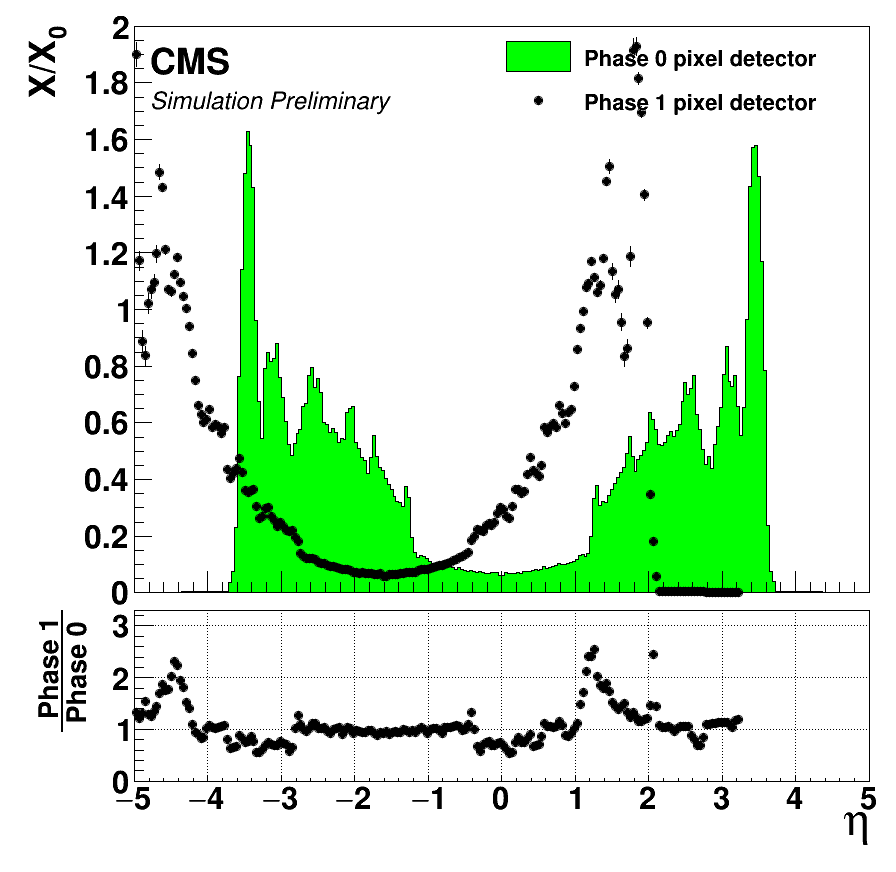

In [16]:
hist0 = file0.Get('10')
hist1 = file1.Get('10')

hist0.SetTitle("")
hist1.SetTitle("")

hist0.SetFillColor(ROOT.kGreen)
hist0.SetFillStyle(1)
hist0.SetLineColor(ROOT.kBlack)
hist0.SetLineWidth(1)

hist1.SetMarkerStyle(8)
hist1.SetMarkerColor(ROOT.kBlack)
# hist1.SetFillColor(ROOT.kBlack)

xmin = -5
xmax = +5

hist0.GetXaxis().SetRangeUser(xmin, xmax)


c1 = TCanvas('c1', 'MB Phase Comparison', 900, 900)
c1.SetTicks(0, 1)
gStyle.SetOptStat(0)

pad1 = TPad("pad1", "pad1",0,0.,1,1)
pad1.SetTopMargin(0.03)
pad1.SetLeftMargin(0.15)
pad1.SetRightMargin(0.03)
pad1.SetBottomMargin(0.32)
pad1.Draw()
pad1.cd()

hist0.SetTitle("")
hist0.GetYaxis().SetTitle("#bf{X/X_{0}}")
hist0.GetXaxis().SetTitle("#bf{#eta}")
hist0.GetYaxis().SetTitleSize(0.045)
hist0.GetYaxis().SetTitleFont(42)
hist0.GetYaxis().SetTitleOffset(1.35)
hist1.GetYaxis().SetTitleOffset(1.35)
hist0.GetXaxis().SetLabelOffset(1000)
    #hist0.GetYaxis().SetNdivisions(515, kTRUE)
hist0.SetMinimum(0.0)
hist0.SetMaximum(2.0)
hist0.Draw("HIST")
hist1.Draw("EP SAME")

leg = TLegend(0.55,0.86,0.96,0.96)
leg.SetBorderSize(0)
leg.SetFillColor(0)
leg.SetFillStyle(0)
leg.SetTextFont(42)
leg.SetTextSize(0.028)
leg.AddEntry(hist0,"#bf{Phase 0 pixel detector}","f")
leg.AddEntry(hist1,"#bf{Phase 1 pixel detector}","p")
leg.Draw()

Pave1 = TPaveText(0.15,0.90,0.50,0.93,"NDC")
Pave1.SetFillColor(0)
Pave1.SetBorderSize(0)
Pave1.SetFillStyle(0)
Pave1.SetTextFont(42)
Pave1.SetTextSize(0.045)
Pave1.SetTextColor(kBlack)
Pave1.SetTextAlign(11)
Pave1.AddText("#bf{CMS}")
Pave1.Draw()

Pave2 = TPaveText(0.15,0.85,0.50,0.90,"NDC")
Pave2.SetFillColor(0)
Pave2.SetBorderSize(0)
Pave2.SetFillStyle(0)
Pave2.SetTextFont(42)
Pave2.SetTextSize(0.03)
Pave2.SetTextColor(kBlack)
Pave2.SetTextAlign(11)
Pave2.AddText("#it{Simulation Preliminary}")
Pave2.Draw()

ratio = hist1.Clone("ratio")
ratio.Divide(hist0)

ratio.GetXaxis().SetRangeUser(xmin, xmax)

pad2 = TPad("pad2", "pad2",0.,0.02,1,0.30)
pad2.SetGrid()      
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.30)
pad2.SetLeftMargin(0.15)
pad2.SetRightMargin(0.03)
pad2.Draw()
pad2.cd()

ratio.SetMinimum(0)
ratio.SetMaximum(3.3)
ratio.SetLineColor(kBlack)
ratio.SetLineWidth(0)
ratio.SetMarkerSize(1.0)
ratio.SetMarkerColor(kBlack)
ratio.GetYaxis().SetNdivisions(505, kTRUE)
ratio.GetYaxis().SetTitleFont(42)
ratio.SetTitle("")
ratio.GetYaxis().SetTitle("#bf{#frac{Phase 1}{ Phase 0 }}")
ratio.GetXaxis().SetTitleFont(42)
ratio.GetXaxis().SetTitle("#bf{#eta}")
ratio.GetXaxis().SetTitleSize(0.20)
ratio.GetXaxis().SetLabelSize(0.14)
ratio.GetYaxis().SetLabelSize(0.14)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.42)
ratio.GetXaxis().SetTitleOffset(0.60)
ratio.Draw("EP")


c1.Update()
c1.Draw()
#     c1.SaveAs("comparisonMBPhase0AndPhase1.C")

# c1.SaveAs("/afs/cern.ch/user/s/sraj/sraj/www/CUA/comparision/CMSSW_10_comparisonMBPhase0AndPhase1_x_X0.png")
# c1.SaveAs("/afs/cern.ch/user/s/sraj/sraj/www/CUA/comparision/CMSSW_10_comparisonMBPhase0AndPhase1_x_x0.pdf")
